In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
import pandas as pd

## Initial examination of data

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d
0,35784929,18000,9.17%,Oct 2014,Fully Paid,700,704,150000.0,Oct 2015
1,35914827,14000,11.67%,Oct 2014,Current,670,674,135000.0,Oct 2015
2,35985086,8400,9.17%,Oct 2014,Current,665,669,75000.0,Oct 2015
3,35945193,10000,7.69%,Oct 2014,Current,730,734,94000.0,Oct 2015
4,35754571,2000,12.99%,Oct 2014,Current,680,684,150000.0,Oct 2015


In [3]:
print df.shape
df.dtypes

(239046, 9)


member_id            int64
loan_amnt            int64
int_rate            object
issue_d             object
loan_status         object
fico_range_low       int64
fico_range_high      int64
annual_inc         float64
last_pymnt_d        object
dtype: object

In [4]:
pd.isnull(df).sum()

member_id             0
loan_amnt             0
int_rate              0
issue_d               0
loan_status           0
fico_range_low        0
fico_range_high       0
annual_inc            0
last_pymnt_d       1337
dtype: int64

In [5]:
df['int_rate'] = df['int_rate'].str.strip()
df['int_rate'] = df['int_rate'].str.strip('%')
df['int_rate'] = df['int_rate'].apply(pd.to_numeric)
df.head()

,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d
0,35784929,18000,9.17,Oct 2014,Fully Paid,700,704,150000.0,Oct 2015
1,35914827,14000,11.67,Oct 2014,Current,670,674,135000.0,Oct 2015
2,35985086,8400,9.17,Oct 2014,Current,665,669,75000.0,Oct 2015
3,35945193,10000,7.69,Oct 2014,Current,730,734,94000.0,Oct 2015
4,35754571,2000,12.99,Oct 2014,Current,680,684,150000.0,Oct 2015


In [6]:
df['fico_avg'] = df[['fico_range_low', 'fico_range_high']].mean(axis=1)

In [7]:
df.head()

,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d,fico_avg
0,35784929,18000,9.17,Oct 2014,Fully Paid,700,704,150000.0,Oct 2015,702.0
1,35914827,14000,11.67,Oct 2014,Current,670,674,135000.0,Oct 2015,672.0
2,35985086,8400,9.17,Oct 2014,Current,665,669,75000.0,Oct 2015,667.0
3,35945193,10000,7.69,Oct 2014,Current,730,734,94000.0,Oct 2015,732.0
4,35754571,2000,12.99,Oct 2014,Current,680,684,150000.0,Oct 2015,682.0


## FICO & Int_Rate

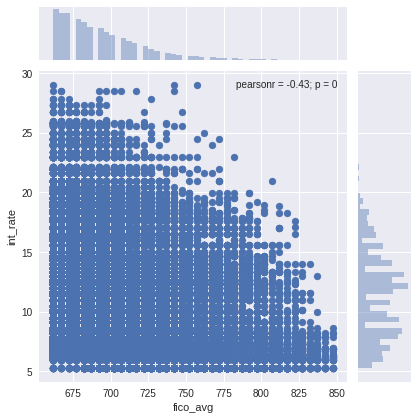

In [8]:
sns.jointplot(x='fico_avg', y='int_rate', data=df)

Generally, the higher the FICO score is, the lower the interest rate is. However, low interest rate also shows for low FICO scores. Therefore, the average interest rates for each FICO score are evaluated as the following:

In [18]:
df_byfico = df.groupby(['fico_avg']).mean()
df_byfico = df_byfico.reset_index()
df_byfico.head()

,fico_avg,member_id,loan_amnt,int_rate,fico_range_low,fico_range_high,annual_inc
0,662.0,4.868540e+07,10720.230066,13.332798,660.0,664.0,65565.889249
1,667.0,4.859252e+07,10986.127878,13.096710,665.0,669.0,65396.867557
2,672.0,4.874109e+07,11469.447326,12.798572,670.0,674.0,67628.061835
3,677.0,4.867104e+07,11736.646272,12.560717,675.0,679.0,68729.640856
4,682.0,4.879777e+07,12409.871612,12.188898,680.0,684.0,70263.959807


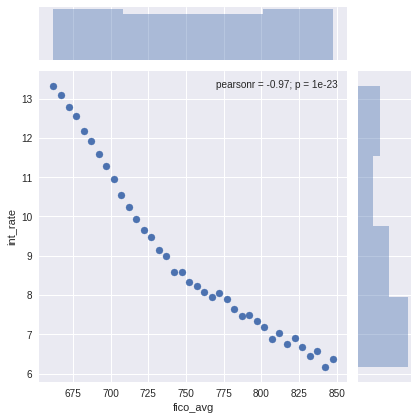

In [19]:
sns.jointplot(x='fico_avg', y='int_rate', data=df_byfico)

In [88]:
df_byfico['int_rate'].shape

(38,)

In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_byfico['fico_avg'].to_frame(), 
                                                    df_byfico['int_rate'].to_frame(),
                                                    test_size=0.3, random_state=10)

regr = make_pipeline(PolynomialFeatures(3), LinearRegression())
regr.fit(X_train, y_train)

print 'Mean squared error: %.2f' % np.mean((regr.predict(X_test) - y_test) ** 2)
print 'Variance score: %.2f' % regr.score(X_test, y_test)

Mean squared error: 0.02
Variance score: 1.00


Conclusion: The larger the FICO score is, the lower the interest rate is. The relationship can be modeled by polynomial regression.

## Loan Amount & Interest Rate

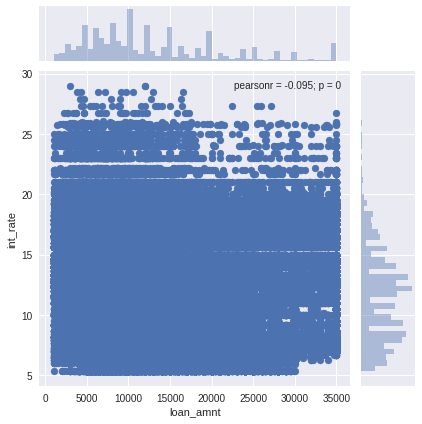

In [51]:
sns.jointplot(x='loan_amnt', y='int_rate', data=df)

In [59]:
import numpy as np
df_byamnt = df.groupby( pd.cut(df['loan_amnt'], np.arange(0, df['loan_amnt'].max()+2500, 2500)) ).mean()

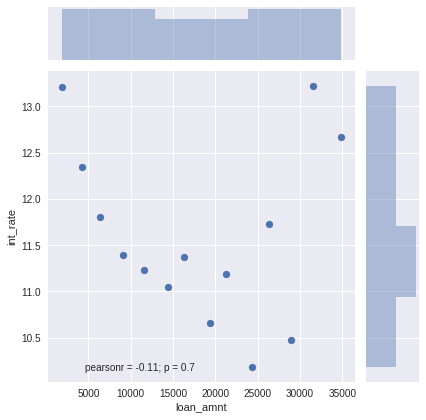

In [47]:
sns.jointplot(x='loan_amnt', y='int_rate', data=df_byamnt)

In [55]:
df_byamnt = df.groupby( pd.cut(df['loan_amnt'], np.arange(0, df['loan_amnt'].max()+1000, 1000)) ).mean()
#counts = df.groupby( pd.cut(df['loan_amnt'], np.arange(0, df['loan_amnt'].max()+1000, 1000)) ).size()
df_byamnt.head()

,member_id,loan_amnt,int_rate,fico_range_low,fico_range_high,annual_inc,fico_avg
loan_amnt,,,,,,,
"(0, 1000]",4.845886e+07,1000.000000,13.510940,688.247863,692.247863,46947.286976,690.247863
"(1000, 2000]",4.877160e+07,1722.913218,13.148792,688.169780,692.170017,49714.006299,690.169898
"(2000, 3000]",4.874163e+07,2745.155955,12.936353,688.202133,692.202133,52930.421420,690.202133
"(3000, 4000]",4.912104e+07,3719.115615,12.834726,688.046407,692.046522,52273.256491,690.046465
"(4000, 5000]",4.893740e+07,4844.753332,11.965339,688.698802,692.698863,55575.232378,690.698832


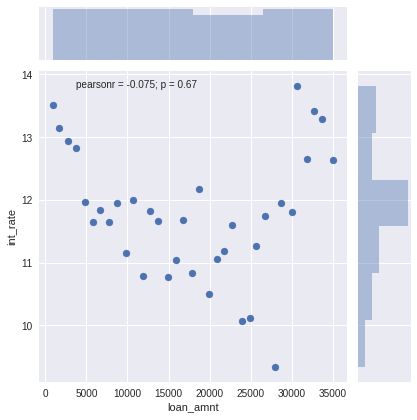

In [56]:
sns.jointplot(x='loan_amnt', y='int_rate', data=df_byamnt)

Grouping by the column 'load_amnt' with different bin sizes. The interest rate is high for both very small and very large loan amount. The interest rates are particularly low for loans with amount between 20000 and 30000 dollars.

## FICO Score, Loan Amount & Loan Status

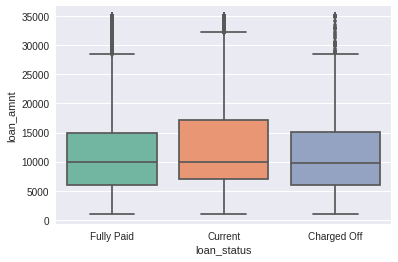

In [57]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette="Set2")

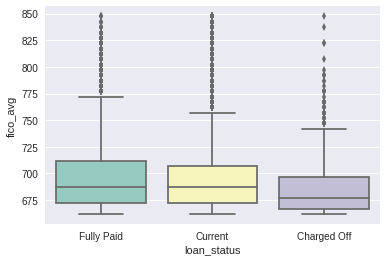

In [58]:
sns.boxplot(x='loan_status', y='fico_avg', data=df, palette="Set3")

In [64]:
df.groupby(['loan_status']).agg(['mean', 'count', 'min', 'max'])['loan_amnt']

,mean,count,min,max
loan_status,,,,
Charged Off,11912.849079,1683,1000,35000
Current,12859.716745,220879,1000,35000
Fully Paid,11573.833718,16484,1000,35000


In [63]:
df.groupby(['loan_status']).agg(['mean', 'count', 'min', 'max'])['fico_avg']

,mean,count,min,max
loan_status,,,,
Charged Off,685.161319,1683,662.0,847.5
Current,694.894137,220879,662.0,847.5
Fully Paid,696.394655,16484,662.0,847.5


For loan amount, the fully paid loans have smaller loan amounts on average.

For FICO score, the charged off loans have much lower FICO scores than the current and fully paid loans on averge. The FICO scores for fully paid loans are slightly higher. 

## Charged Off Percentage

In [65]:
group_df = df.groupby('loan_status')
group_df.get_group('Charged Off').head()

,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d,fico_avg
18,35974764,30000,18.24,Oct 2014,Charged Off,725,729,69498.0,NaN,727.0
89,35784636,10000,17.57,Oct 2014,Charged Off,680,684,35000.0,Jun 2015,682.0
165,35984500,4625,12.49,Oct 2014,Charged Off,710,714,30000.0,Jul 2015,712.0
167,34130430,10000,12.99,Oct 2014,Charged Off,690,694,40000.0,Jun 2015,692.0
175,35844594,35000,25.83,Oct 2014,Charged Off,680,684,100000.0,Apr 2015,682.0


In [66]:
print 1.0*len(group_df.groups['Charged Off'])/df.shape[0]
print 1.0*len(group_df.groups['Current'])/df.shape[0]
print 1.0*len(group_df.groups['Fully Paid'])/df.shape[0]

0.00704048593158
0.924002074914
0.068957439154


0.7% of loans have been charged off as of October 2015.

## Estimate the Charged Off in the future: Survival analysis

In [67]:
from datetime import datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b %Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b %Y', errors='coerce')
df.head()

,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d,fico_avg
0,35784929,18000,9.17,2014-10-01,Fully Paid,700,704,150000.0,2015-10-01,702.0
1,35914827,14000,11.67,2014-10-01,Current,670,674,135000.0,2015-10-01,672.0
2,35985086,8400,9.17,2014-10-01,Current,665,669,75000.0,2015-10-01,667.0
3,35945193,10000,7.69,2014-10-01,Current,730,734,94000.0,2015-10-01,732.0
4,35754571,2000,12.99,2014-10-01,Current,680,684,150000.0,2015-10-01,682.0


In [68]:
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['issue_d'])

In [69]:
df[df['last_pymnt_d'].isnull()]

,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d,fico_avg


In [70]:
from datetime import timedelta
import numpy as np

T = []
E = []
for index, row in df.iterrows():
    if row['loan_status'] != 'Charged Off':
        E.append(0)     
    else:
        E.append(1)
    td = row['last_pymnt_d']-row['issue_d']+timedelta(30)
    T.append((td / np.timedelta64(1, 'D')).astype(int))

In [71]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 239046 observations, 237363 censored>

In [72]:
kmf.survival_function_.head()

,KM_estimate
timeline,
0.0,1.000000
30.0,0.999615
58.0,0.999539
60.0,0.999337
61.0,0.998972


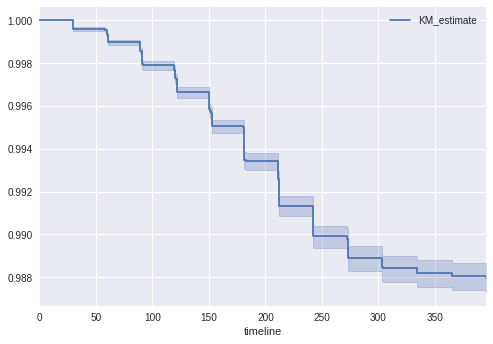

In [73]:
kmf.plot()

In [74]:
current_df = group_df.get_group('Current')
current_df.head()

,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d,fico_avg
1,35914827,14000,11.67,2014-10-01,Current,670,674,135000.0,2015-10-01,672.0
2,35985086,8400,9.17,2014-10-01,Current,665,669,75000.0,2015-10-01,667.0
3,35945193,10000,7.69,2014-10-01,Current,730,734,94000.0,2015-10-01,732.0
4,35754571,2000,12.99,2014-10-01,Current,680,684,150000.0,2015-10-01,682.0
5,35925142,6000,9.17,2014-10-01,Current,725,729,60000.0,2015-10-01,727.0


In [75]:
current_df['left_days'] = timedelta(365*3)- (current_df['last_pymnt_d']-current_df['issue_d']+timedelta(30))

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
prob_sum = 0
for days in current_df['left_days']:
    days_int = (days / np.timedelta64(1, 'D')).astype(int)
    prob_sum += 1-kmf.predict(days_int)
prob_sum

2659.0162071274008

In [77]:
proportion_expectation = prob_sum/current_df.shape[0]
proportion_expectation

0.012038338670165117

1.2% of the current loans will be charged off after October 2015. 